In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# Vertical cyllinder

In [ ]:
rho_s = 2710 # kg/m^3, density of solid
rho_l = 1000 # kg/m^3, density of fluid
eta_l = 0.001 # kg/m-s, viscosity of fluid
g = 9.8 # m/s^2, gravitational acceleration

Re_p = rho_l / eta_l # Reynolds number of particle


In [12]:
df = pd.read_csv('./verticle_cyllinder.csv')
display(df.head())


,t,h_20,h_40,h_60,h_80,h_160
0,0,346.0,347.0,344.0,345,363.0
1,1,328.0,333.0,334.0,338,358.0
2,2,308.0,323.0,328.0,334,356.0
3,3,283.0,313.0,323.0,331,355.0
4,4,268.0,302.0,318.0,328,355.0


u_s = 0.3235294117647057 mm/s


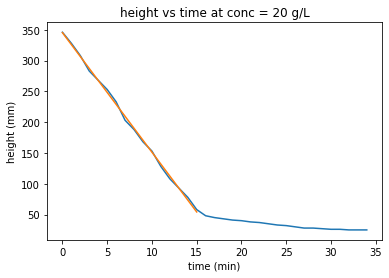

In [31]:
plt.plot(df['t'], df['h_20'])
plt.title('height vs time at conc = 20 g/L')
plt.xlabel('time (min)')
plt.ylabel('height (mm)')

tt_20 = 16 # tt = transition time, from observation
m_20, c_20 = np.polyfit(df['t'][:tt_20], df['h_20'][:tt_20], 1)

plt.plot(df['t'][:tt_20], m_20*df['t'][:tt_20] + c_20)

u_s = -1 * m_20 / 60 # mm/s, u_s = u_t for free-settling region (assumption)
print(f'u_s = {u_s} mm/s')

D_p = (18 * eta_l * u_s / g / Re_p)**0.5 # particle diameter


[20, 40, 60, 80, 160]
[0.3235294117647057, 0.17003576134010903, 0.0801008064516129, 0.041119962067330554, 0.015514492753623321]


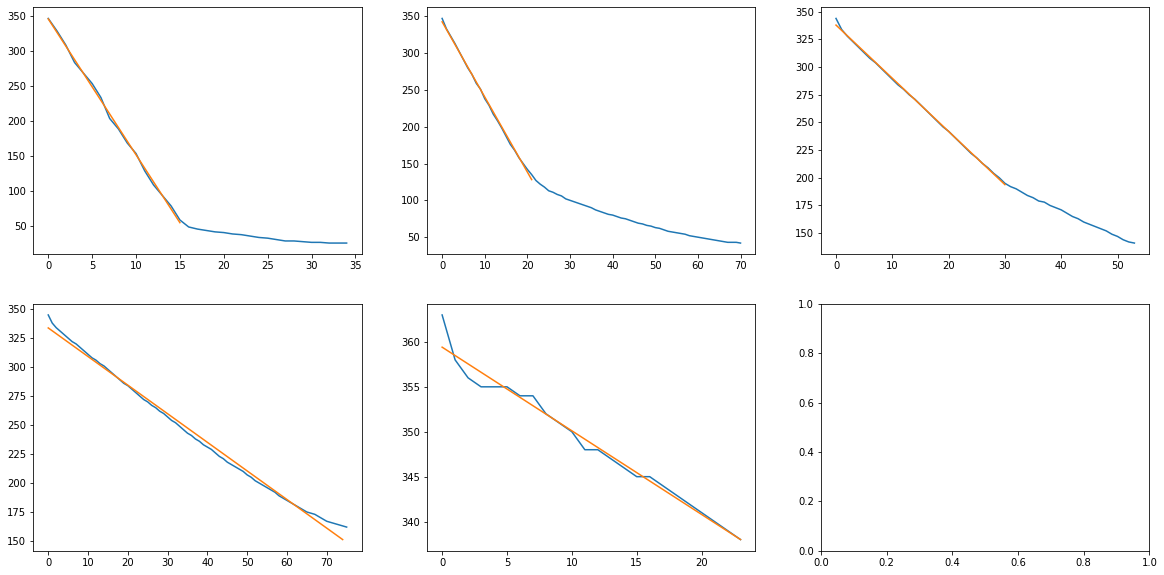

In [58]:
c = [20, 40, 60, 80, 160]
u = [0] * len(c)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# C = 20 g/L
tt_20 = 16
m_20, c_20 = np.polyfit(df['t'][:tt_20], df['h_20'][:tt_20], 1)
u[0] = -1 * m_20 / 60

ax[0][0].plot(df['t'], df['h_20'])
ax[0][0].plot(df['t'][:tt_20], m_20*df['t'][:tt_20] + c_20)

# C = 40 g/L
tt_40 = 22
m_40, c_40 = np.polyfit(df['t'][:tt_40], df['h_40'][:tt_40], 1)
u[1] = -1 * m_40 / 60

ax[0][1].plot(df['t'], df['h_40'])
ax[0][1].plot(df['t'][:tt_40], m_40*df['t'][:tt_40] + c_40)

# C = 60 g/L
tt_60 = 31
m_60, c_60 = np.polyfit(df['t'][:tt_60], df['h_60'][:tt_60], 1)
u[2] = -1 * m_60 / 60

ax[0][2].plot(df['t'], df['h_60'])
ax[0][2].plot(df['t'][:tt_60], m_60*df['t'][:tt_60] + c_60)

# C = 80 g/L
tt_80 = 75
m_80, c_80 = np.polyfit(df['t'][:tt_80], df['h_80'][:tt_80], 1)
u[3] = -1 * m_80 / 60
ax[1][0].plot(df['t'], df['h_80'])
ax[1][0].plot(df['t'][:tt_80], m_80*df['t'][:tt_80] + c_80)

# C = 160 g/L
tt_160 = 24
m_160, c_160 = np.polyfit(df['t'][:tt_160], df['h_160'][:tt_160], 1)
u[4] = -1 * m_160 / 60
ax[1][1].plot(df['t'], df['h_160'])
ax[1][1].plot(df['t'][:tt_160], m_160*df['t'][:tt_160] + c_160)

print(c)
print(u)

$$
    u_s = u_t * (1 - k * \frac{c}{\rho_s})^n
$$

$$
    (\frac{u_1}{u_2})^{1/n} = \frac{1 - k*\frac{c_1}{\rho_s}}{1 - k*\frac{c_2}{\rho_s}} = \alpha
$$

$$
    k = \frac{\rho_s * (1 - \alpha)}{c_1 - \alpha * c_2}
$$

In [63]:
n = 4.5
k = [0] * len(c)

for i in range(1, len(c)):
    alpha = (u[i] / u[i-1])**(1/n)
    k[i] = rho_s * (1 - alpha) / (c[i] - alpha * c[i-1])

print("k: ", k)
print("Average k: ", sum(k) / len(k))

k:  [0, 15.927509666316908, 15.955764201388899, 13.205247352113524, 5.521821522968316]
Average k:  10.122068548557529


# Tilted cyllinder

In [ ]:
w = 102.5 # mm
b = 100.5 # mm
theta = 15 # deg

